In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Regression model using Keras
### using popular california housing dataset - available in sklearn lib


In [3]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Data Set Characteristics:
#### Number of Instances: 20640

#### Number of Attributes: 8 numeric, predictive attributes and the target

#### Attribute Information:
1. MedInc median income in block
2. HouseAge median house age in block
3. AveRooms average number of rooms
4. AveBedrms average number of bedrooms
5. Population block population
6. AveOccup average house occupancy
7. Latitude house block latitude
8. Longitude house block longitude
#### Target
The target variable is the median house value in units of 100,000 for California districts.

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [11]:
# Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
X_train.shape

(11610, 8)

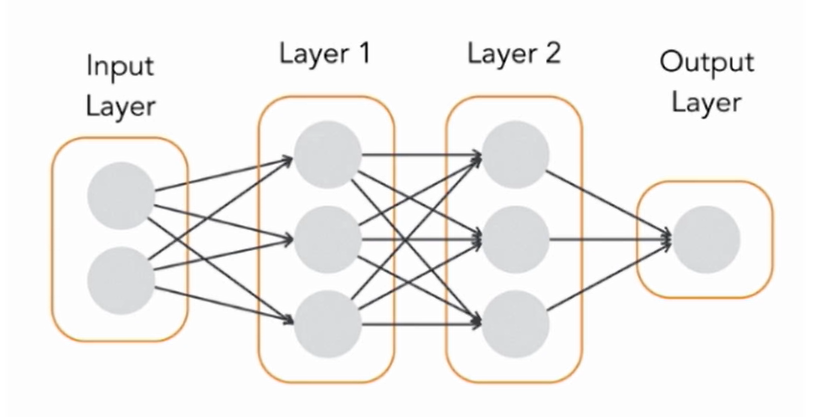

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), #Layer 1
    keras.layers.Dense(30, activation="relu"), # Layer 2
    keras.layers.Dense(1) # output Layer
])

In [15]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = "mean_squared_error",
              optimizer = keras.optimizers.SGD(lr= 1e-3),
              metrics = ['mae']) # lr - learning rate, mae - Mean absoulte error

In [17]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [18]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3942 - mae: 0.4502


In [19]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

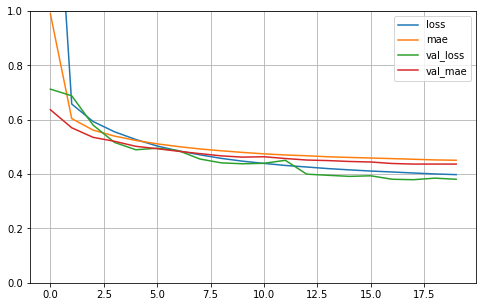

In [20]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
X_new = X_test[:3] # just taking 3 values

In [22]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5328768]
 [1.8915398]
 [3.404087 ]]
[0.477   0.458   5.00001]


In [23]:
del model

In [24]:
keras.backend.clear_session()

## Functional API
#### Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer.
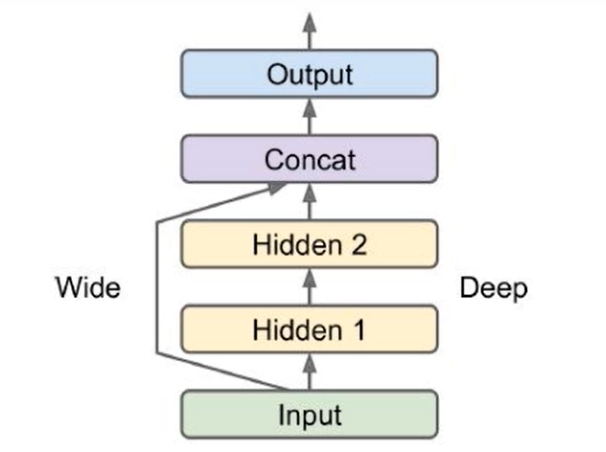


In [25]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) #just merging input layer and hidden2
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [26]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [27]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [28]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/80
363/363 [==============================] - 1s 2ms/step - loss: 0.

363/363 [==============================] - 1s 2ms/step - loss: 0.3556 - mae: 0.4225 - val_loss: 0.3694 - val_mae: 0.4167
Epoch 63/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3543 - mae: 0.4214 - val_loss: 0.3630 - val_mae: 0.4180
Epoch 64/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3544 - mae: 0.4217 - val_loss: 0.3432 - val_mae: 0.4145
Epoch 65/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3537 - mae: 0.4213 - val_loss: 0.3550 - val_mae: 0.4144
Epoch 66/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3530 - mae: 0.4206 - val_loss: 0.3571 - val_mae: 0.4142
Epoch 67/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3524 - mae: 0.4202 - val_loss: 0.3724 - val_mae: 0.4162
Epoch 68/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3520 - mae: 0.4198 - val_loss: 0.3612 - val_mae: 0.4137
Epoch 69/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3515

In [29]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3453 - mae: 0.4147


In [30]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311981439590454,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.4502205550670624,
  0.4432658851146698,
  0.43632543087005615,
  0.4306245744228363,
  0.4253448247909546,
  0.42129331827163696,
  0.4168177843093872,
  0.4126453101634979,
  0.40958571434020996,
  0.4059634208679199,
  0.40294399857521057,
  0.4000455439090729,
  0.3971884846687317,
  0.3946215510368347,
  0.3924905061721802,
  0.3904934525489807,
  0.38845309615135193,
  0.38671210408210754,
  0.38484567403793335,
  0.382953941822052,
  0.3815852701663971,
  0.3805288076400757,
  0.37870272994041443,
  0.3775632083415985,
  0.3763015866279602,
  0.37508344650268555,
  0.37408941984176636,
  0.3728184998035431,
  0.37164586782455444,
  0.3710441291332245,
  0.3702850639820099,
  0.3690377473831177,
  0.3680499196052551,
  0.3677287399

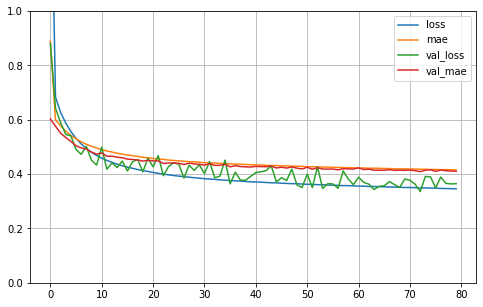

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

## Saving and Restoring

In [32]:
model.save("my_func_model.h5")

In [33]:
%pwd

'C:\\Users\\yashp'

In [34]:
del model

In [35]:
keras.backend.clear_session()

In [36]:
model = keras.models.load_model("my_func_model.h5")

In [37]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [38]:
y_pred = model.predict(X_new)
y_pred

array([[0.7181078],
       [1.6815798],
       [4.1708875]], dtype=float32)

## Using callbacks during Training 
#we can think of callbacks as a checkpoint models

In [39]:
del model

In [40]:
keras.backend.clear_session()

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [43]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5") # model - name,epochs

In [45]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [ ]:
del model
keras.backend.clear_session()

In [48]:
model = keras.models.load_model("Model-10.h5")

In [49]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

1/1 [==============================] - 0s 8ms/step - loss: 0.4382


In [50]:
print (mse_test)

0.4382284879684448


## Best Model Only

In [51]:
del model
keras.backend.clear_session()

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [55]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4224

In [56]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4366


## Early stopping best model only

In [57]:
del model
keras.backend.clear_session()

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [61]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [62]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.5780 - val_loss: 2.2266
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 0.9287
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.8430 - val_loss: 0.9400
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7673 - val_loss: 0.7490
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7194 - val_loss: 0.6682
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6799 - val_loss: 0.6534
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6466 - val_loss: 0.6407
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6173 - val_loss: 0.5704
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5894 - val_loss: 0.5552
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5645 - val_lo

In [63]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3481
